In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
# from sepObjectiveGO import getObjective as gO
# from dynesty import DynamicNestedSampler
# from dynesty import plotting as dyplot
# from CFitter import CFitter
# import make_sim_data as msd
import data_in as dIn
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [2]:
data1 = ReflectDataset("lipidBilayerData/54696_97_edit.txt")
data2 = ReflectDataset("lipidBilayerData/54699_00_edit.txt")


In [3]:
print(data1.data,data2.data)

(array([0.0105, 0.011 , 0.0114, 0.0118, 0.0123, 0.0128, 0.0133, 0.0139,
       0.0144, 0.015 , 0.0156, 0.0162, 0.0169, 0.0175, 0.0182, 0.019 ,
       0.0197, 0.0205, 0.0213, 0.0222, 0.0231, 0.024 , 0.0249, 0.0259,
       0.027 , 0.028 , 0.0292, 0.0303, 0.0315, 0.0328, 0.0341, 0.0355,
       0.0369, 0.0384, 0.0399, 0.0415, 0.0431, 0.0449, 0.0467, 0.0485,
       0.0505, 0.0525, 0.0546, 0.0567, 0.059 , 0.0614, 0.0638, 0.0664,
       0.069 , 0.0718, 0.0746, 0.0776, 0.0807, 0.0839, 0.0873, 0.0908,
       0.0944, 0.0982, 0.102 , 0.106 , 0.11  , 0.115 , 0.119 , 0.124 ,
       0.129 , 0.134 , 0.14  , 0.145 , 0.151 , 0.157 , 0.163 , 0.17  ,
       0.177 , 0.184 , 0.191 , 0.199 , 0.207 , 0.215 , 0.223 , 0.232 ,
       0.242 , 0.251 , 0.261 , 0.272 , 0.283 , 0.294 ]), array([7.68e-01, 8.02e-01, 7.85e-01, 7.96e-01, 7.91e-01, 8.06e-01,
       8.01e-01, 8.07e-01, 8.01e-01, 7.85e-01, 7.91e-01, 7.79e-01,
       7.63e-01, 6.24e-01, 2.57e-01, 1.11e-01, 6.85e-02, 4.70e-02,
       3.43e-02, 2.66e-02, 2.02

<IPython.core.display.Javascript object>


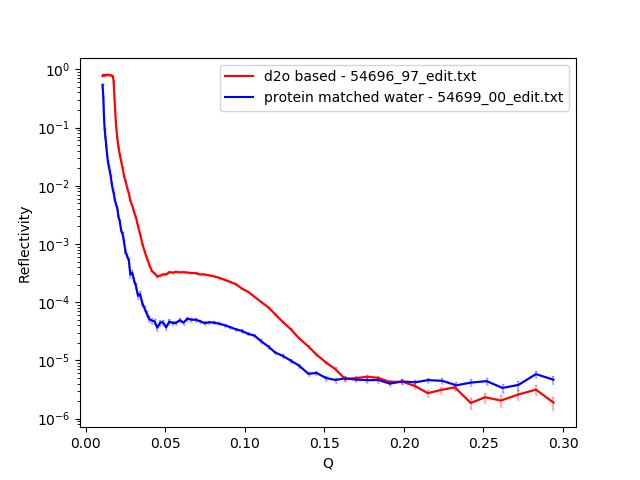

In [5]:
%matplotlib notebook
plt.plot(data1.data[0],data1.data[1],color="r",label="d2o based - 54696_97_edit.txt")
plt.plot(data2.data[0],data2.data[1],color="b",label="protein matched water - 54699_00_edit.txt")
plt.errorbar(data1.data[0],data1.data[1], data1.data[2],alpha=0.3,color="r",capsize=.5)
plt.errorbar(data2.data[0],data2.data[1], data2.data[2],alpha=0.3,color="b",capsize=.5)
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.yscale("log")
plt.legend();